In [26]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

In [27]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

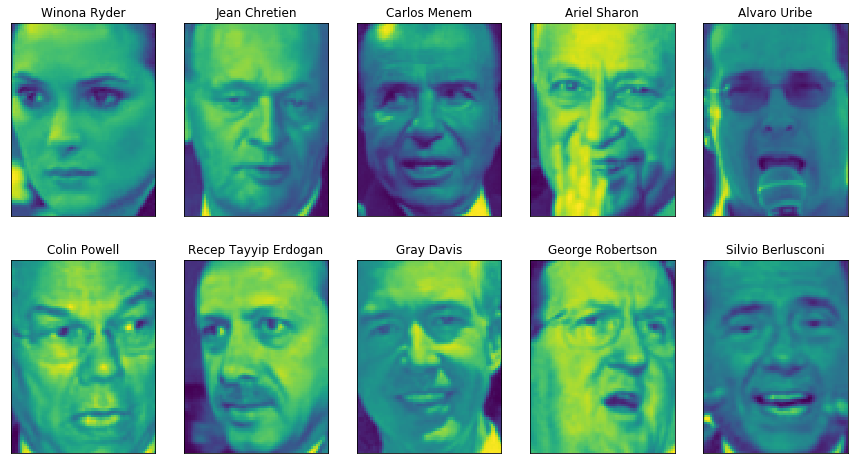

In [28]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [29]:
print("people.images.shape:{}".format(people.images.shape))
print("클래스 개수:{}".format(len(people.target_names)))

people.images.shape:(3023, 87, 65)
클래스 개수:62


In [30]:
#각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
#타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end='\n')
    if(i+1)%3==0:
        print    

Alejandro Toledo          39
Alvaro Uribe              35
Amelie Mauresmo           21
Andre Agassi              36
Angelina Jolie            20
Ariel Sharon              77
Arnold Schwarzenegger     42
Atal Bihari Vajpayee      24
Bill Clinton              29
Carlos Menem              21
Colin Powell             236
David Beckham             31
Donald Rumsfeld          121
George Robertson          22
George W Bush            530
Gerhard Schroeder        109
Gloria Macapagal Arroyo   44
Gray Davis                26
Guillermo Coria           30
Hamid Karzai              22
Hans Blix                 39
Hugo Chavez               71
Igor Ivanov               20
Jack Straw                28
Jacques Chirac            52
Jean Chretien             55
Jennifer Aniston          21
Jennifer Capriati         42
Jennifer Lopez            21
Jeremy Greenstock         24
Jiang Zemin               20
John Ashcroft             53
John Negroponte           31
Jose Maria Aznar          23
Juan Carlos Fe

In [31]:
#데이터셋의 편중을 없애기 위해 50개의 이미지만 추출
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
#MinMaxScaler
X_people = X_people/255

In [32]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
#이웃 개수를 한 개로 하여 KNeighborsClassifier 모델
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수:0.23


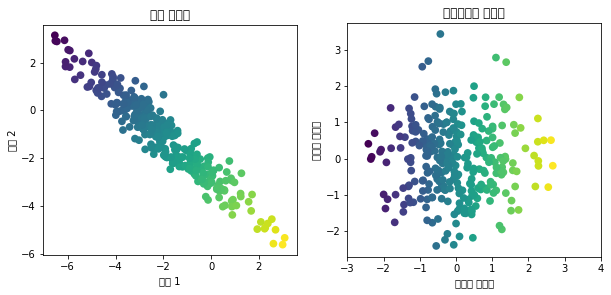

In [33]:
mglearn.plots.plot_pca_whitening()

In [34]:
#PCA객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape:{}".format(X_train_pca.shape))

X_train_pca.shape:(1547, 100)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도:0.31


pca.components_.shape:(100, 5655)


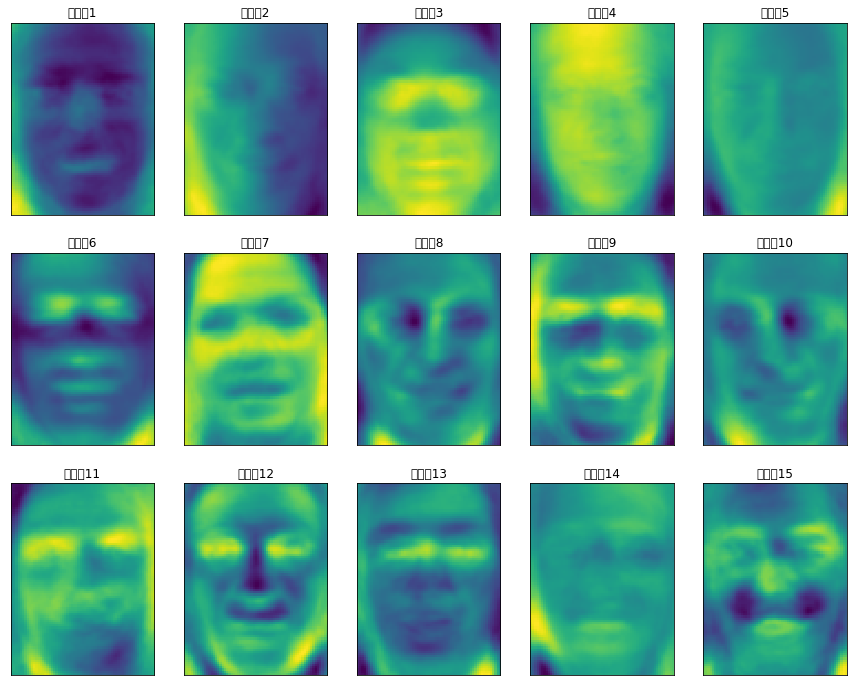

In [36]:
#이미지 데이터는 주성분을 쉽게 시각화 할 수 있다.
print("pca.components_.shape:{}".format(pca.components_.shape))
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분{}".format((i+1)))

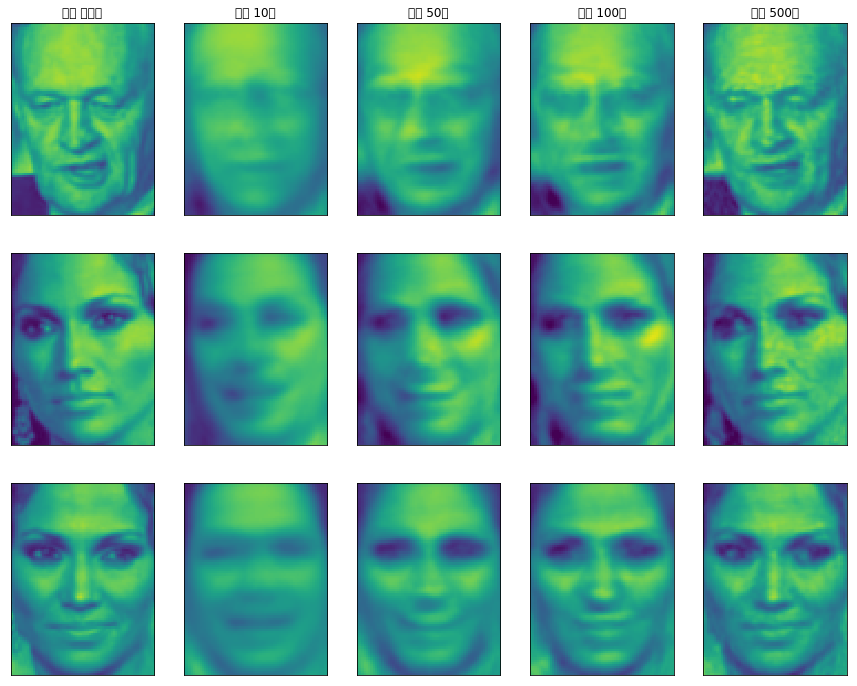

In [37]:
#원본 데이터 재구성하기
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'두번째 주성분')

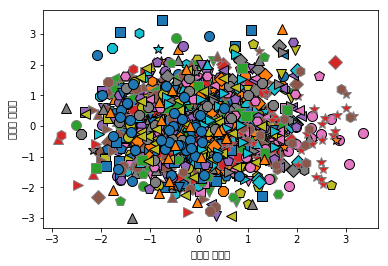

In [38]:
#처음 두 개의 주성분을 이용하여 만든 얼굴 데이터셋의 산점도
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")

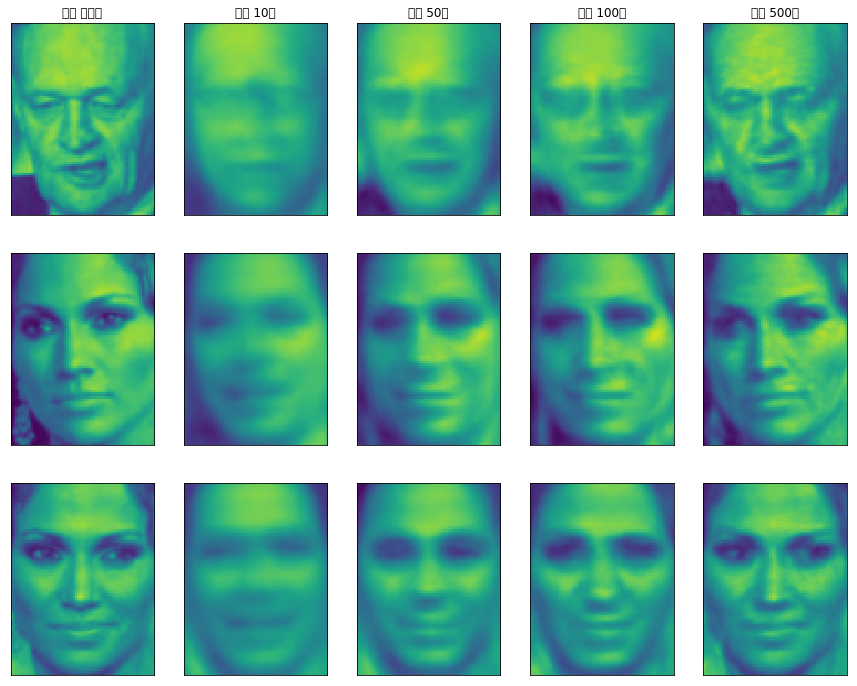

In [39]:
#얼굴 이미지에 NMF 적용하기
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

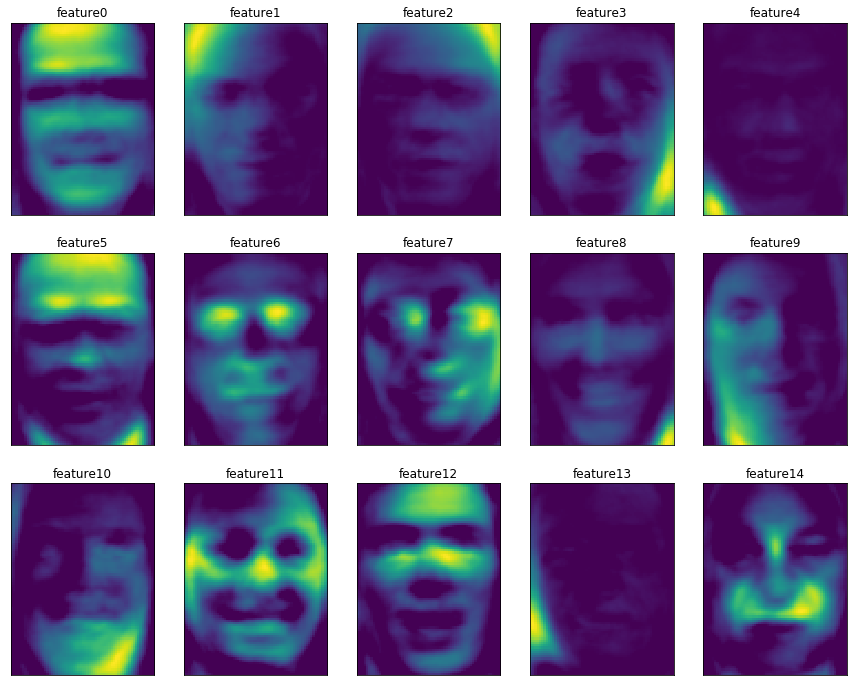

In [43]:

from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("feature{}".format(i))

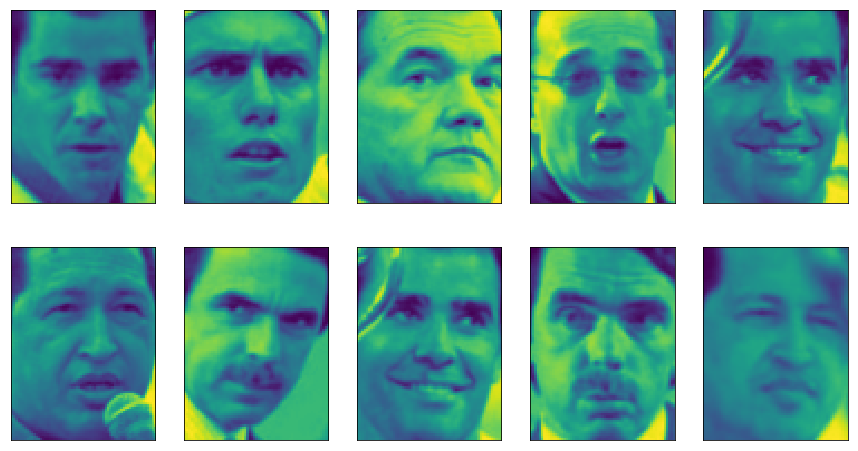

In [44]:
compn=3
#4번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15,8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

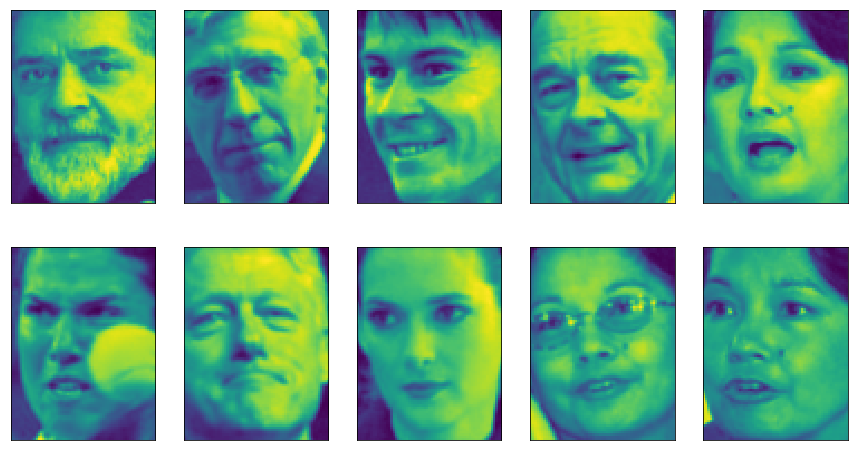

In [45]:
compn=7
#8번째 성분으로 정렬하여 처음 10개 이미지 출력
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15,8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [48]:
##PCA, NMF, K-means에서 추출한 성분과 100개의 성분으로 테스트 세트의 얼굴을 재구성
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0,0.5,'nmf')

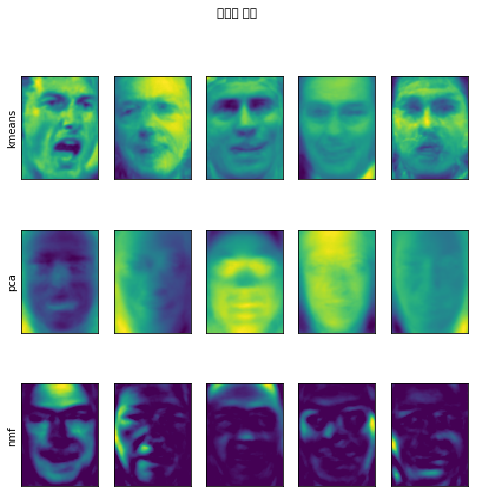

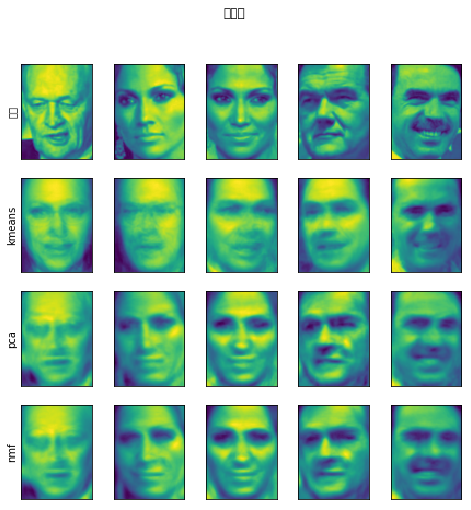

In [49]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

##얼굴 데이터셋으로 군집 알고리즘 비교

In [51]:
#LFW데이터에서 고유 얼굴을 찾은 다음 데이터를 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True, random_state = 1)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

"""이 주성분은 얼굴 이미지의 원본 픽셀보다 의미있는 정보를 담고 있다. 계산도 빠르게 도와줌"""

In [52]:
"""DBSCAN으로 얼굴 데이터셋 분석하기"""
#기본 매개변수로 DBSCAN을 적용
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:{}".format(np.unique(labels)))

고유한 레이블:[-1]


In [53]:
dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:{}".format(np.unique(labels)))
"""클러스터의 최소 포인트를 3으로 줄여도 모두 잡음 포인트로 레이블 했음"""

고유한 레이블:[-1]


In [54]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:{}".format(np.unique(labels)))
"""클러스터 하나와 잡음 포인트를 얻었다."""

고유한 레이블:[-1  0]


In [56]:
#잡음 포인트와 클러스터에 속한 포인트 수 개수
#bincount는 음수X labels에 +1
#반환값의 첫 번째 원소는 잡음 포인트의 수이다.
print("클러스터별 포인트 수:{}".format(np.bincount(labels+1)))
"""잡음 포인트는 총 31개이다."""

클러스터별 포인트 수:[  31 2032]


'잡음 포인트는 총 31개이다.'

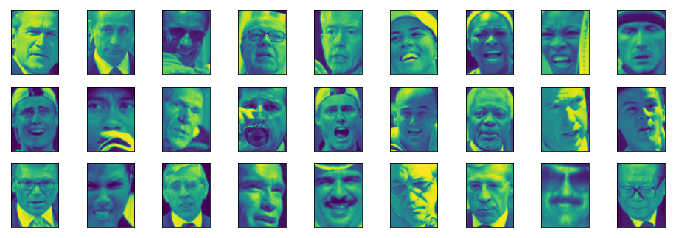

In [60]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw = {'xticks':(), 'yticks':()}, figsize = (12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps")